In [1]:
# Tetuan City Power Consumption: Week 4 - Model Optimization & Interpretability

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import shap  # SHAP is a powerful library for model interpretability.

# Set plot style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

c:\ProgramData\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# --- 1. Data Loading and Preparation (Identical to previous script) ---
try:
    df = pd.read_csv('Tetuan City power consumption.csv')
except FileNotFoundError:
    print("Error: 'Tetuan City power consumption.csv' not found.")
    exit()

df.columns = df.columns.str.strip().str.replace(' ', '_')
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

features_to_use = [
    'Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
    'Zone_1_Power_Consumption', 'Zone_2__Power_Consumption', 'Zone_3__Power_Consumption'
]
data = df[features_to_use].copy()
# Add cyclical time features
data['hour_sin'] = np.sin(2 * np.pi * data.index.hour / 24.0)
data['hour_cos'] = np.cos(2 * np.pi * data.index.hour / 24.0)
data['dayofweek_sin'] = np.sin(2 * np.pi * data.index.dayofweek / 7.0)
data['dayofweek_cos'] = np.cos(2 * np.pi * data.index.dayofweek / 7.0)

# We now have more features due to the cyclical encoding
FEATURE_NAMES = data.columns.tolist()

# --- Data Splitting ---
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.15)
train_df = data.iloc[:train_size]
val_df = data.iloc[train_size:train_size + val_size]
test_df = data.iloc[train_size + val_size:]

# --- Scaling ---
scaler = MinMaxScaler()
scaler.fit(train_df)
train_scaled = scaler.transform(train_df)
val_scaled = scaler.transform(val_df)
test_scaled = scaler.transform(test_df)

print("--- Data Preparation Complete ---")

--- Data Preparation Complete ---


In [3]:
# --- 2. Training Strategies: Early Stopping Class ---
# This class monitors validation loss and stops training if it doesn't improve
# for a specified number of epochs ('patience').
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


--- Processing Zone 1 (Target: Zone_1_Power_Consumption) ---


--- Optimized Model Architecture (Bidirectional LSTM) ---
BiLSTMForecaster(
  (lstm): LSTM(11, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)
Epoch 1/50 | Train Loss: 0.007602 | Validation Loss: 0.001312
Epoch 2/50 | Train Loss: 0.000661 | Validation Loss: 0.000350
Epoch 3/50 | Train Loss: 0.000502 | Validation Loss: 0.000716
EarlyStopping counter: 1 out of 5
Epoch 4/50 | Train Loss: 0.000420 | Validation Loss: 0.000275
Epoch 5/50 | Train Loss: 0.000347 | Validation Loss: 0.000724
EarlyStopping counter: 1 out of 5
Epoch 6/50 | Train Loss: 0.000312 | Validation Loss: 0.000559
EarlyStopping counter: 2 out of 5
Epoch 7/50 | Train Loss: 0.000270 | Validation Loss: 0.000174
Epoch 8/50 | Train Loss: 0.000256 | Validation Loss: 0.000142
Epoch 9/50 | Train Loss: 0.000222 | Validation Loss: 0.000130
Epoch 10/50 | Train Loss: 0.000217 | Validation

C:\Users\NHP\AppData\Roaming\Python\Python310\site-packages\shap\explainers\_deep\deep_pytorch.py:255: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f"unrecognized nn.Module: {module_type}")


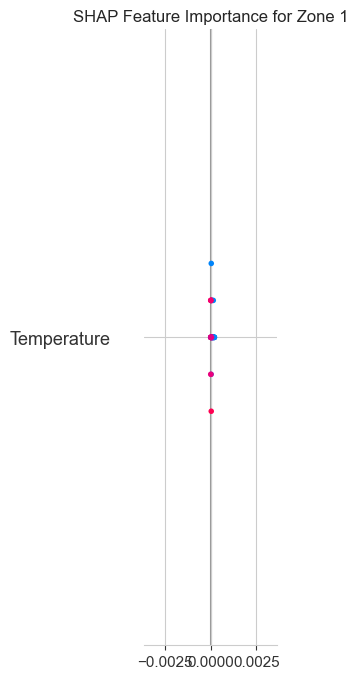

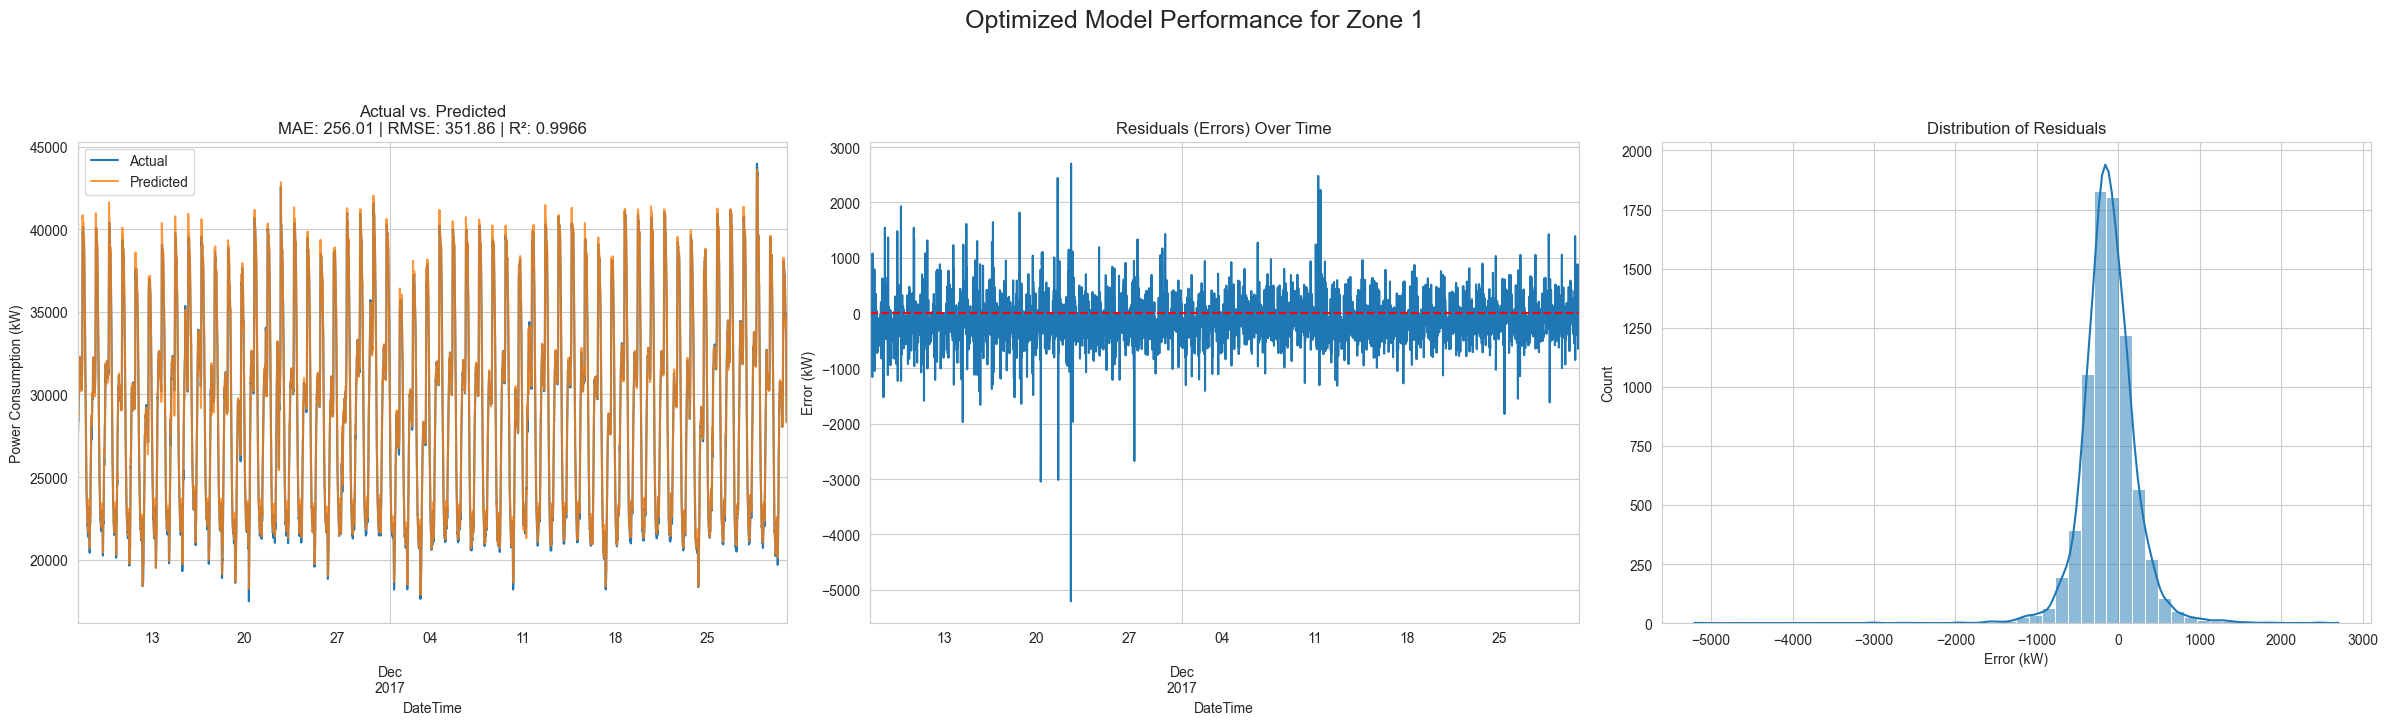


--- Processing Zone 2 (Target: Zone_2__Power_Consumption) ---


--- Optimized Model Architecture (Bidirectional LSTM) ---
BiLSTMForecaster(
  (lstm): LSTM(11, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)
Epoch 1/50 | Train Loss: 0.005588 | Validation Loss: 0.000406
Epoch 2/50 | Train Loss: 0.000480 | Validation Loss: 0.001041
EarlyStopping counter: 1 out of 5
Epoch 3/50 | Train Loss: 0.000388 | Validation Loss: 0.000328
Epoch 4/50 | Train Loss: 0.000326 | Validation Loss: 0.000996
EarlyStopping counter: 1 out of 5
Epoch 5/50 | Train Loss: 0.000290 | Validation Loss: 0.000224
Epoch 6/50 | Train Loss: 0.000243 | Validation Loss: 0.000211
Epoch 7/50 | Train Loss: 0.000237 | Validation Loss: 0.000145
Epoch 8/50 | Train Loss: 0.000207 | Validation Loss: 0.000135
Epoch 9/50 | Train Loss: 0.000190 | Validation Loss: 0.000118
Epoch 10/50 | Train Loss: 0.000175 | Validation Loss: 0.000108
Epoch 11/50 | Tra

C:\Users\NHP\AppData\Roaming\Python\Python310\site-packages\shap\explainers\_deep\deep_pytorch.py:255: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f"unrecognized nn.Module: {module_type}")


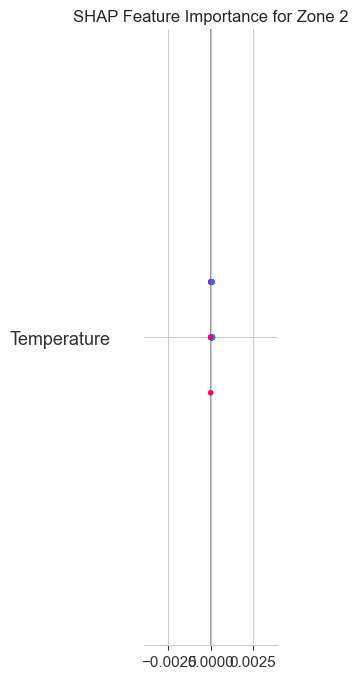

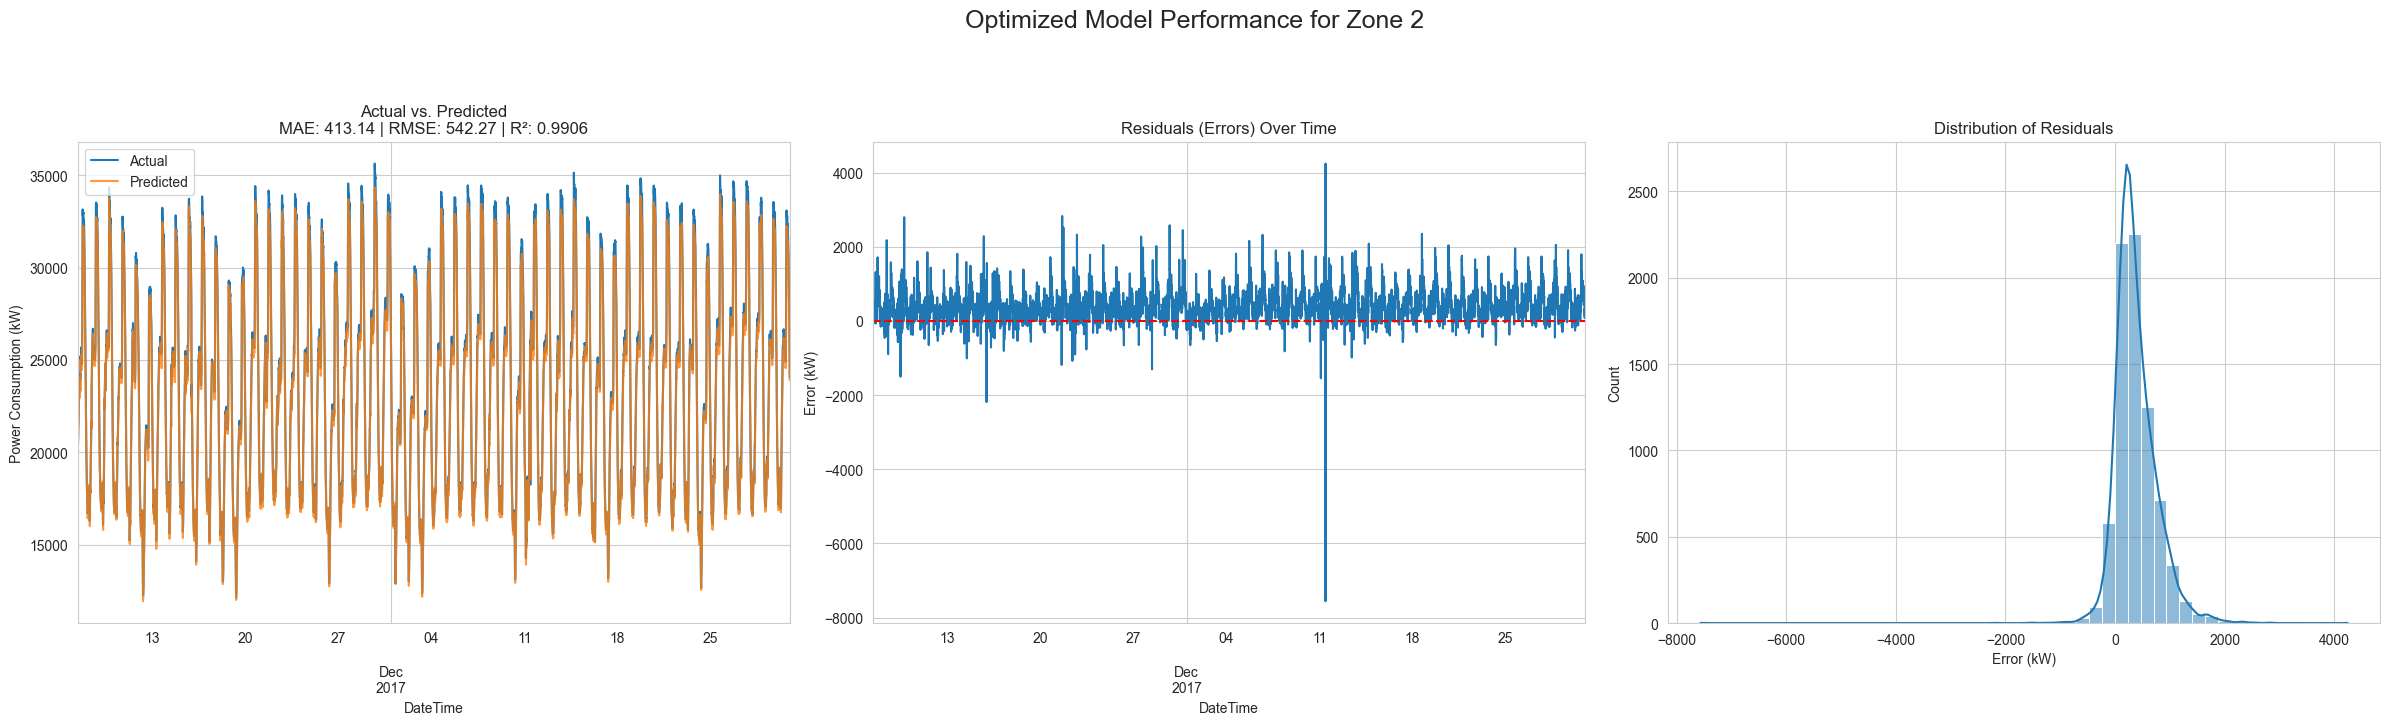


--- Processing Zone 3 (Target: Zone_3__Power_Consumption) ---


--- Optimized Model Architecture (Bidirectional LSTM) ---
BiLSTMForecaster(
  (lstm): LSTM(11, 64, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)
Epoch 1/50 | Train Loss: 0.003651 | Validation Loss: 0.000781
Epoch 2/50 | Train Loss: 0.000402 | Validation Loss: 0.000355
Epoch 3/50 | Train Loss: 0.000288 | Validation Loss: 0.000337
Epoch 4/50 | Train Loss: 0.000234 | Validation Loss: 0.000507
EarlyStopping counter: 1 out of 5
Epoch 5/50 | Train Loss: 0.000198 | Validation Loss: 0.000193
Epoch 6/50 | Train Loss: 0.000171 | Validation Loss: 0.000128
Epoch 7/50 | Train Loss: 0.000158 | Validation Loss: 0.000156
EarlyStopping counter: 1 out of 5
Epoch 8/50 | Train Loss: 0.000144 | Validation Loss: 0.000132
EarlyStopping counter: 2 out of 5
Epoch 9/50 | Train Loss: 0.000132 | Validation Loss: 0.000122
Epoch 10/50 | Train Loss: 0.000122 | Validatio

C:\Users\NHP\AppData\Roaming\Python\Python310\site-packages\shap\explainers\_deep\deep_pytorch.py:255: UserWarning: unrecognized nn.Module: LSTM
  warnings.warn(f"unrecognized nn.Module: {module_type}")


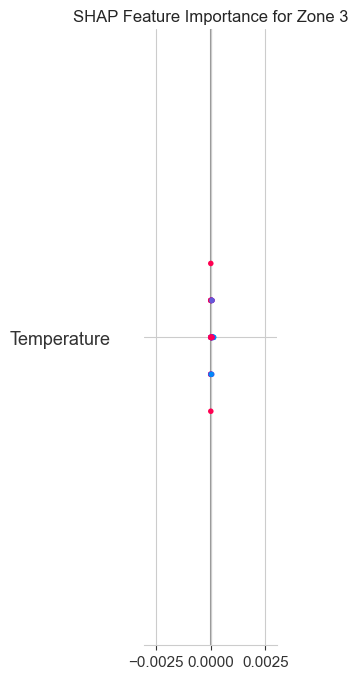

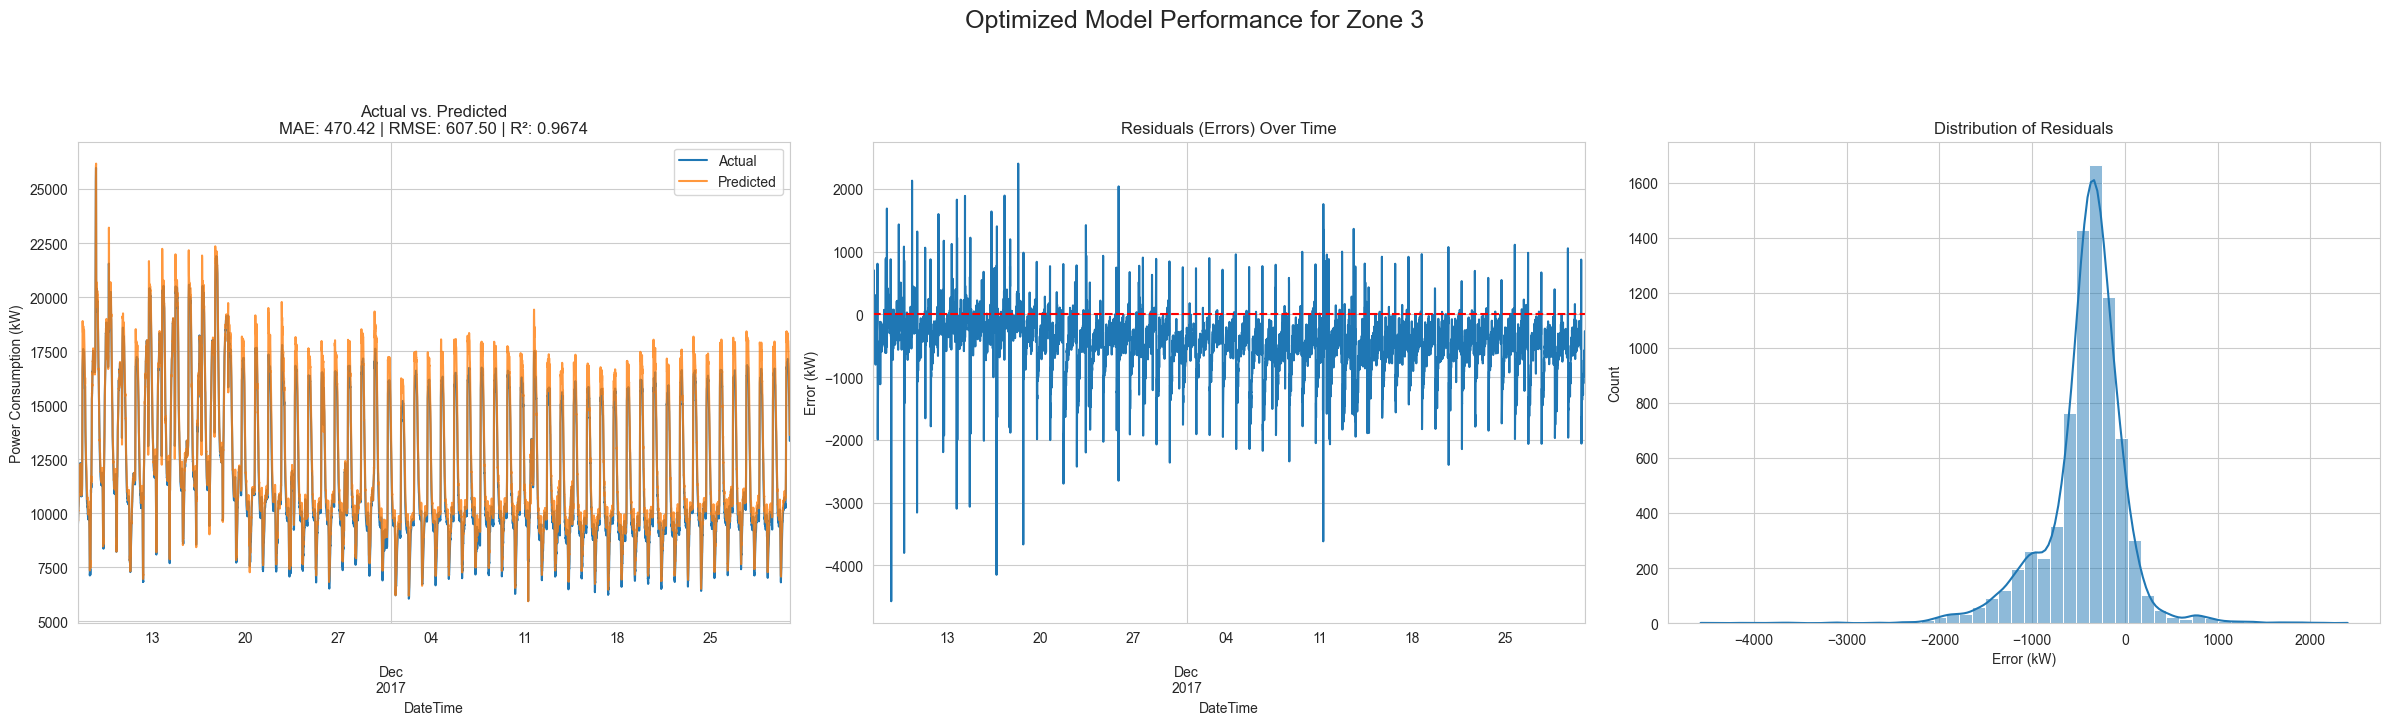

In [4]:
# ############################################################################
# The rest of the script is now wrapped in a loop to process each zone.
# ############################################################################

TARGET_ZONES = {
    'Zone 1': 'Zone_1_Power_Consumption',
    'Zone 2': 'Zone_2__Power_Consumption',
    'Zone 3': 'Zone_3__Power_Consumption'
}

# Loop through each zone. Each iteration can be placed in a separate cell.
for i, (zone_name, target_col_name) in enumerate(TARGET_ZONES.items()):
    print(f"\n{'='*80}")
    print(f"--- Processing {zone_name} (Target: {target_col_name}) ---")
    print(f"{'='*80}\n")

    # --- Sequence Creation ---
    def create_sequences(input_data, lookback_window, target_column_index):
        X, y = [], []
        for i in range(len(input_data) - lookback_window):
            sequence = input_data[i:(i + lookback_window)]
            target = input_data[i + lookback_window, target_column_index]
            X.append(sequence)
            y.append(target)
        return np.array(X), np.array(y)

    LOOKBACK_WINDOW = 144
    TARGET_COL_IDX = train_df.columns.get_loc(target_col_name)

    X_train, y_train = create_sequences(train_scaled, LOOKBACK_WINDOW, TARGET_COL_IDX)
    X_val, y_val = create_sequences(val_scaled, LOOKBACK_WINDOW, TARGET_COL_IDX)
    X_test, y_test = create_sequences(test_scaled, LOOKBACK_WINDOW, TARGET_COL_IDX)

    # --- DataLoaders ---
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    BATCH_SIZE = 64
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


    # --- Architecture Tuning: Bidirectional LSTM ---
    # We experiment with a bidirectional LSTM. This allows the network to learn
    # from the sequence in both forward and backward directions.
    class BiLSTMForecaster(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate):
            super(BiLSTMForecaster, self).__init__()
            self.lstm = nn.LSTM(input_size=input_size,
                                hidden_size=hidden_size,
                                num_layers=num_layers,
                                batch_first=True,
                                dropout=dropout_rate,
                                bidirectional=True) # Key change: set bidirectional to True
            # The linear layer input must be doubled because we concatenate forward and backward passes
            self.linear = nn.Linear(hidden_size * 2, output_size)

        def forward(self, x):
            lstm_out, _ = self.lstm(x)
            last_time_step_out = lstm_out[:, -1, :]
            out = self.linear(last_time_step_out)
            return out

    # Model hyperparameters
    INPUT_SIZE = X_train.shape[2]
    HIDDEN_SIZE = 64
    NUM_LAYERS = 2
    OUTPUT_SIZE = 1
    DROPOUT_RATE = 0.2

    model = BiLSTMForecaster(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS, OUTPUT_SIZE, DROPOUT_RATE)
    print("\n--- Optimized Model Architecture (Bidirectional LSTM) ---")
    print(model)
    print("="*80)

    # --- Training & Experimentation ---
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # NEW: Initialize Early Stopping and Learning Rate Scheduler
    early_stopper = EarlyStopping(patience=5, verbose=True)
    # This scheduler reduces the learning rate when validation loss plateaus
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

    EPOCHS = 50 # Increase max epochs since we have early stopping
    train_losses = []
    val_losses = []

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_function(output, batch_y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                output = model(batch_X)
                loss = loss_function(output, batch_y)
                running_val_loss += loss.item()
        
        avg_val_loss = running_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train_loss:.6f} | Validation Loss: {avg_val_loss:.6f}")
        
        # NEW: Call scheduler and early stopper
        scheduler.step(avg_val_loss)
        early_stopper(avg_val_loss, model)
        if early_stopper.early_stop:
            print("Early stopping triggered!")
            break

    print(f"\n--- Training Complete for {zone_name} ---")

    # --- Evaluation ---
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            output = model(batch_X)
            predictions.append(output.numpy())
            actuals.append(batch_y.numpy())
    predictions = np.concatenate(predictions).flatten()
    actuals = np.concatenate(actuals).flatten()

    dummy_array = np.zeros((len(predictions), len(data.columns)))
    dummy_array[:, TARGET_COL_IDX] = predictions
    predictions_inversed = scaler.inverse_transform(dummy_array)[:, TARGET_COL_IDX]
    dummy_array_actuals = np.zeros((len(actuals), len(data.columns)))
    dummy_array_actuals[:, TARGET_COL_IDX] = actuals
    actuals_inversed = scaler.inverse_transform(dummy_array_actuals)[:, TARGET_COL_IDX]

    mae = metrics.mean_absolute_error(actuals_inversed, predictions_inversed)
    rmse = np.sqrt(metrics.mean_squared_error(actuals_inversed, predictions_inversed))
    r2 = metrics.r2_score(actuals_inversed, predictions_inversed)
    print(f"\n--- Evaluation on Test Set for {zone_name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f} kW")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} kW")
    print(f"R-squared (R²): {r2:.4f}")

    # --- Model Interpretability with SHAP ---
    print("\n--- Calculating SHAP values for model interpretability ---")
    # To save time, we use a small subset of the training data as a background
    # and a small subset of the test data for explanation.
    background_data = X_train_tensor[np.random.choice(X_train_tensor.shape[0], 100, replace=False)]
    test_subset = X_test_tensor[np.random.choice(X_test_tensor.shape[0], 50, replace=False)]

    # Create a SHAP explainer
    explainer = shap.DeepExplainer(model, background_data)
    # Add check_additivity=False to bypass the assertion error for complex models
    shap_values = explainer.shap_values(test_subset, check_additivity=False)

    # The result is complex. For a time series, we get shap values for each feature at each time step.
    # We can average the absolute SHAP values across the time steps to get a single importance value per feature.
    shap_values_agg = np.abs(shap_values).mean(axis=1)
    
    # FIX: The summary plot expects a 2D features array. We aggregate our 3D test_subset
    # in the same way as the shap_values: by taking the mean over the time-step dimension (axis=1).
    features_agg = test_subset.numpy().mean(axis=1)

    # Create a SHAP summary plot using the aggregated features
    shap.summary_plot(shap_values_agg, features=features_agg, feature_names=FEATURE_NAMES, plot_type="bar", show=False)
    plt.title(f'SHAP Feature Importance for {zone_name}')
    plt.show()

    # --- Visualization (Error Analysis) ---
    results_df = pd.DataFrame({
        'Actual': actuals_inversed,
        'Predicted': predictions_inversed
    }, index=test_df.index[LOOKBACK_WINDOW:])

    fig_zone, axes_zone = plt.subplots(1, 3, figsize=(24, 7))
    fig_zone.suptitle(f'Optimized Model Performance for {zone_name}', fontsize=18, y=1.03)

    results_df['Actual'].plot(ax=axes_zone[0], label='Actual')
    results_df['Predicted'].plot(ax=axes_zone[0], label='Predicted', alpha=0.8)
    title_text = (f'Actual vs. Predicted\n' f'MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}')
    axes_zone[0].set_title(title_text)
    axes_zone[0].set_ylabel('Power Consumption (kW)')
    axes_zone[0].legend()

    results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']
    results_df['Residuals'].plot(ax=axes_zone[1])
    axes_zone[1].set_title('Residuals (Errors) Over Time')
    axes_zone[1].set_ylabel('Error (kW)')
    axes_zone[1].axhline(0, color='r', linestyle='--')

    sns.histplot(results_df['Residuals'], bins=50, kde=True, ax=axes_zone[2])
    axes_zone[2].set_title('Distribution of Residuals')
    axes_zone[2].set_xlabel('Error (kW)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()